<a href="https://colab.research.google.com/github/Diogg0/Deep_learning/blob/main/deep_learning_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning using math
**This is an implementation of neural network to predict the value from a 28*28 image representing a digit**


**Basic libraries are used as it saves time since these functions are easy to implement and dont require explanation**

In [ ]:
import numpy as np
import pandas as pd

# Dataset
**The dataset contains 785 pixel values of digits ranging from 0 to 10**

In [ ]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Initializing of data

In [ ]:
data = np.array(data)
rows,cols = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data[0]
X_dev = data[1:cols]
X_dev = X_dev/255.

data_train = data[1000:rows].T
Y_train = data_train[0]
X_train = data_train[1:cols]
X_train = X_train/ 255.


# Fundamental Functions to shift weights and biases
**This neural network has 1 input layer, 1 hidden layer using ReLu activation function and 1 output layer using SoftMax function.Forward and backward propagation are defined in this block, at the start all weights and biases are defined randomly**

In [ ]:
def initialize():
    w1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    w2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5

    return w1,b1,w2,b2

def ReLu(Z):
    return np.maximum(Z,0)

def SoftMax(Z):
    res = np.exp(Z)/sum(np.exp(Z))
    return res

def ReLu_deriv(Z):
    return Z > 0

def OneHotEncode(Y):
    one_hot = np.zeros((Y.size, 10))
    one_hot[np.arange(Y.size), Y] = 1
    return one_hot.T


def forward_propagation(w1,b1,w2,b2,X):
    z1 = w1.dot(X) + b1
    a1 = ReLu(z1)
    z2 = w2.dot(a1) + b2
    a2 = SoftMax(z2)
    return z1,a1,z2,a2

def back_propagation(z1,a1,z2,a2,w1,w2,X,Y):
    one_hot_Y = OneHotEncode(Y)
    dZ2 = a2 - one_hot_Y
    dW2 = 1/rows * dZ2.dot(a1.T)
    db2 = 1/rows * np.sum(dZ2)
    dZ1 = w2.T.dot(dZ2) * ReLu_deriv(z1)

    dW1 = 1/rows * dZ1.dot(X.T)
    db1 = 1/rows * np.sum(dZ1)
    return dW1, db1, dW2, db2
def update(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 -=alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2

    return W1,b1,W2,b2

# Gradient Descent
**Gradien descent is defined by initialising the weights and biases and performing forward and backward propagation given number of times**

In [ ]:
def get_predict(A2):
    return np.argmax(A2,0)

def accuracy(predictions,Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/Y.size

def gradient_descent(X,Y, alpha, epoch):
    print("Gradient descent has been called")
    W1,b1,W2,b2 = initialize()
    for i in range(epoch):
        Z1, A1, Z2, A2 = forward_propagation(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 = back_propagation(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2 = update(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)

        if i % 10 == 0:
            print(f"Epoch:{i} ")
            predictions = predict(A2)
            print(accuracy(predictions,Y))
    return W1,b1,W2,b2

In [ ]:
W1,b1,W2,b2 = gradient_descent(X_train,Y_train, 0.20, 500)

Gradient descent has been called
Epoch:0 
[5 0 0 ... 0 5 0] [7 2 0 ... 3 1 1]
0.10902439024390244
Epoch:10 
[2 8 0 ... 7 6 1] [7 2 0 ... 3 1 1]
0.2955853658536585
Epoch:20 
[6 8 0 ... 3 1 1] [7 2 0 ... 3 1 1]
0.409390243902439
Epoch:30 
[6 8 0 ... 3 1 1] [7 2 0 ... 3 1 1]
0.4840243902439024
Epoch:40 
[6 8 0 ... 3 1 1] [7 2 0 ... 3 1 1]
0.5478780487804878
Epoch:50 
[6 2 0 ... 3 1 1] [7 2 0 ... 3 1 1]
0.6105121951219512
Epoch:60 
[9 2 0 ... 3 1 1] [7 2 0 ... 3 1 1]
0.6633658536585366
Epoch:70 
[9 2 0 ... 3 1 1] [7 2 0 ... 3 1 1]
0.7015853658536585
Epoch:80 
[9 2 0 ... 3 1 1] [7 2 0 ... 3 1 1]
0.7281463414634146
Epoch:90 
[7 2 0 ... 3 1 1] [7 2 0 ... 3 1 1]
0.7491707317073171
Epoch:100 
[7 2 0 ... 3 1 1] [7 2 0 ... 3 1 1]
0.7658780487804878
Epoch:110 
[7 2 0 ... 3 1 1] [7 2 0 ... 3 1 1]
0.7795853658536586
Epoch:120 
[7 2 0 ... 3 1 1] [7 2 0 ... 3 1 1]
0.7919024390243903
Epoch:130 
[7 2 0 ... 3 1 1] [7 2 0 ... 3 1 1]
0.8011707317073171
Epoch:140 
[7 2 0 ... 3 1 1] [7 2 0 ... 3 1 1]
0.80873

# Prediction
**Predict function is called here and predicted value is compared with the respective label**

In [ ]:
from matplotlib import pyplot as plt

def predict(X,W1,b1,W2,b2):
    _,_,_,A2 = forward_propagation(W1,b1,W2,b2,X)
    predictions = get_predict(A2)
    return predictions

def test_prediction(index,W1,b1,W2,b2):
    current_image = X_train[:, index,None]
    prediction = predict(X_train[:, index, None], W1,b1,W2,b2)
    label = Y_train[index]
    print(f"Preidction:{prediction}")
    print(f"Label:{label}")

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Preidction:[3]
Label:3


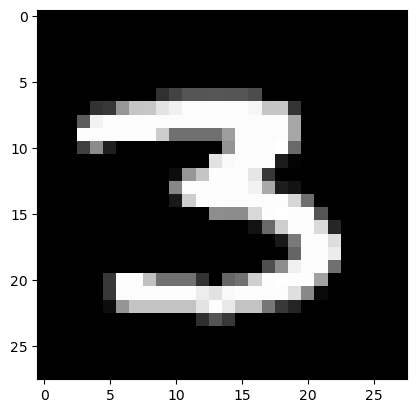

Preidction:[0]
Label:0


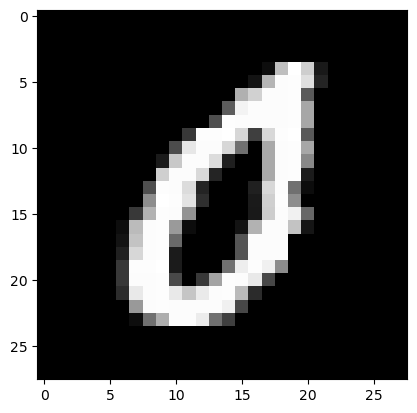

Preidction:[2]
Label:2


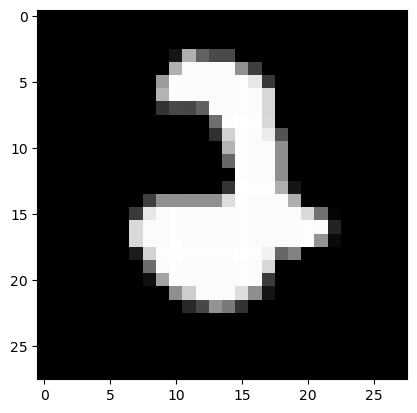

Preidction:[8]
Label:8


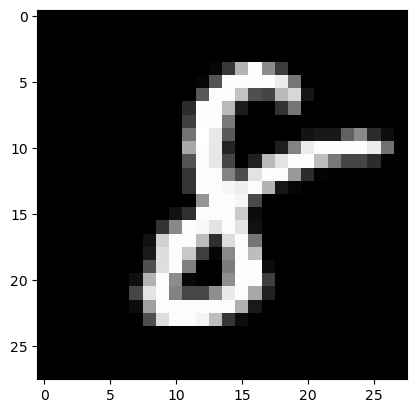

In [ ]:
test_prediction(9,W1,b1,W2,b2)
test_prediction(2,W1,b1,W2,b2)
test_prediction(11,W1,b1,W2,b2)
test_prediction(20,W1,b1,W2,b2)